# Homework 2 | Simple linear regression using TensorFlow in Python
## Universidad de Monterrey
### Inteligencia Artificial II
Víctor Manuel Contreras González 625627

Lecturer Dr. Andrés Hernández Gutiérrez

San Pedro Garza García, N.L. 30 August 2024

>*El objetivo de esta práctica es terminar de familiarizarse con los términos utilizados en TensowFlow, una estructura de datos y aprendizaje de Google, y repasar lo observado en clase acerca del uso correcto de la sintaxis dentro de este entorno.*

Se importan las librerías que se utilizarán en el programa y se crean datos sintéticos.

**numpy** Importa la librería que permite generar operaciones matemáticas con datos numéricos y con areglos.

**pandas** Librería usada en Data Science; permite entrenar y validar series de datos en el desarrollo de redes neuronales.

**tensorflow** Permite entrenar y validar series de datos en el desarrollo de redes neuronales.

**matplotlib.pyplot** Biblioteca que permite crear gráficos y herramientas visuales.

**sklearn.model_selection** A **train_test_split** Función que divide datasets en conjuntos de entrenamiento y prueba para aplicaciones de machine learning.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**def generate_data** Se define la función generate_data y se colocan parámetros para recibir cierto tamaño de array con ayuda de NumPy, se define la desviación estándar, y cuántas muestras se generan.

**np.random.seed(4500)** Se establece una semilla para que los resultados sean reproducibles.

**x = np.arange(0,100, 1)** Se genera un array de valores x que van desde el 0 al 99 con un paso de 1, siendo un total de 100.
  
**y = true_coeffs** Se generan los valores que corresponden a la forma de la ecuación lineal w0 + w1*x más algo de ruido declarado como una distribución normal, por lo mismo, se define la media como 0.0.

**return (x, y)** Devuelve los valores de *x* y *y*, siendo características y respuesta respectivamente.

In [2]:
def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):

  # Seed for reproducibility
  np.random.seed(4500)

  # Generate synthetic data
  x = np.arange(0,100, 1)
  y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

  # Return features and response
  return (x, y)

**true_coeffs** Se definen los coeficientes de la ecuación, w0 y w1.

**noise_std** Se establece la desviación estándar del ruido a 5.

**x, y = generate_data** Se genera el dataset con el ruido y desviación ya declaradas, y se indica que el número de muestras será 100.

In [3]:
# Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

**plt.figure** Se crea una figura de 10x7 unidades (pulgadas).

**plt.scatter** Se grafican los datos; cada par de datos como puntos dispersos.

**plt.xlabel** Se agrega una etiqueta al eje de las X, con el tamaño de letra en 20.

**plt.ylabel** Se agrega una etiqueta al eje de las Y, con el tamaño de letra en 20.

**plt.title** Se agrega un título a la figura o gráfico.

**plt.legend()** Se activa que se muestre la leyenda del gráfico.

**plt.show()** Se despliega la gráfica.

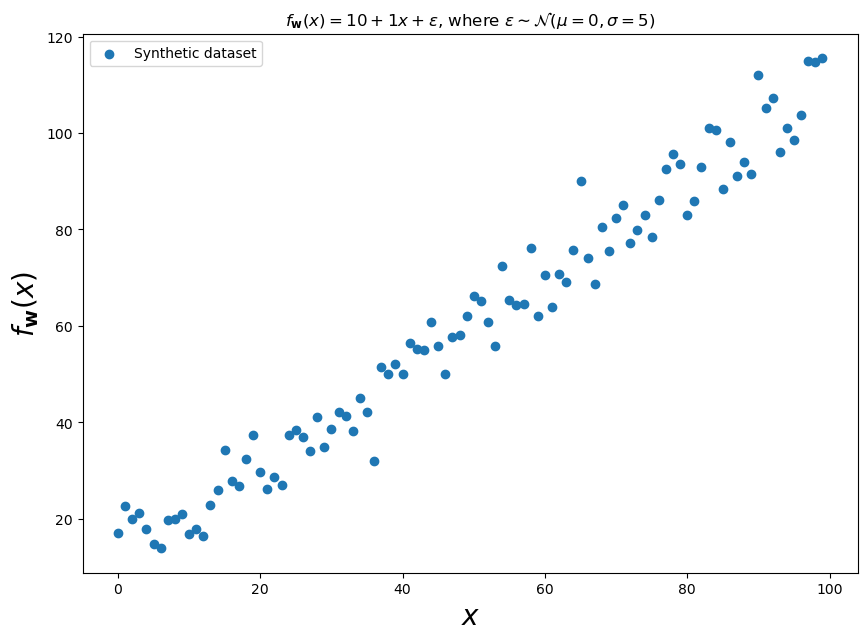

In [4]:
# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset' )
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}} (x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}} (x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0,\sigma={noise_std} )$",
    fontsize=12)
plt.legend()
plt.show()

**x_train, x_test, y_train, y_test** Se dividen los sets de data en entrenamiento y prueba, declarando que un 20% se irá a prueba y el resto a entrenamiento, y también se asigna una semilla de aleatoriedad (42) para que siempre se haga la misma división y las corridas sean consistentes en lo que se trabaja con el modelo.

**plt.figure** Se crea una figura de 10x7 unidades (pulgadas).

**plt.scatter** Se grafican los datos; cada par de datos como puntos dispersos.

**plt.scatter** Se grafican los datos; cada par de datos como puntos dispersos.

**plt.xlabel** Se agrega una etiqueta al eje de las X, con el tamaño de letra en 20.

**plt.ylabel** Se agrega una etiqueta al eje de las Y, con el tamaño de letra en 20.

**plt.title** Se agrega un título a la figura o gráfico.

**plt.legend()** Se activa que se muestre la leyenda del gráfico.

**plt.show()** Se despliega la gráfica.

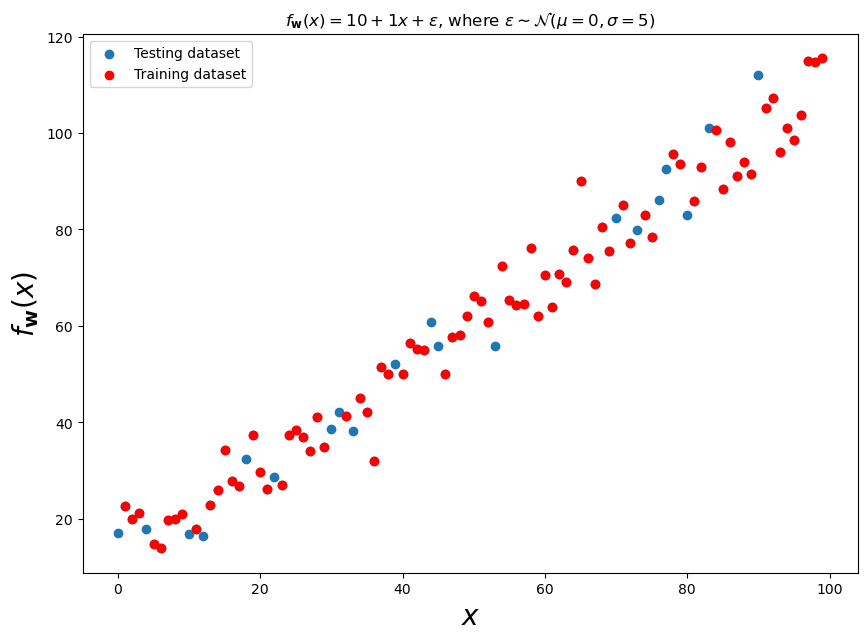

In [5]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x)= {true_coeffs[0]}+ {true_coeffs[1]} x+ \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
    fontsize=12)
plt.legend()
plt.show()

**model = tf.keras.Sequential** Se define un modelo secuencial usando TensorFlow y su función de Keras para construir un modelo capa por capa.

**tf.keras.layers.Input** Se define la forma de la entrada del modelo, en este caso es de forma lineal por el array de tipo vector que se declaró (1).
    
**tf.keras.layers.Dense** Se agrega una capa de tipo densa la cual se encarga de implemetar la regresión lineal, de una entrada y una salida, tomando en cuenta los weights.
    
**model.compile** Se compila el modelo con el optimizador *adam*, que se encarga de ajustar los weights del modelos, y con la función de pérdida *mse* (Mean Squared Error).

**model.summary** Muestra un resumen de toda la información relevante del modelo, como sus indicadores de desempeño.

In [6]:
# Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**model.fit** Se entrena al modelo con los datos de entrenamiento a través de 500 épocas, usando el 10% de los datos para validar la calidad del modelo.

**loss = model.evaluate** Se evelua al modelo con los datos de prueba y se guarda la "pérdida" calculada; mientras más bajo, mejor.

**print** Se imprime en la interfaz un mensaje, en este caso el nivel de Loss del entrenamiento.

In [14]:
# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=0)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 29.7640

Test Loss: 29.764019012451172


**weights = model.layers[0].get_weights()** Función que obtiene los weights , w1, y sesgo, w0, del modelo y los guarda.

**print(f"Weights [w1]: {weights[0]}")** Se imprimen los weights del parámetro w1

**print(f"Biases [w0]: {weights[1]}")** Se imprime el sesgo, el parámetro w0.

**y_pred = model.predict** Se realizan las predicciones con los datos de prueba.

**y_pred_train = model.predict** Se realizan las predicciones con los datos de entrenamiento.

In [15]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

# Make predictions
y_pred = model.predict(x_test)
# Make predictions
y_pred_train = model.predict(x_train)

Weights [w1]: [[0.9820328]]
Biases [w0]: [10.907524]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


**plt.figure** Se crea una figura de 12x6 unidades (pulgadas).

**plt.scatter** Se grafican los datos; cada par de datos como puntos dispersos.

**plt.scatter** Se grafican los datos; cada par de datos como puntos dispersos.

**plt.xlabel** Se agrega una etiqueta al eje de las X, con el tamaño de letra en 20.

**plt.ylabel** Se agrega una etiqueta al eje de las Y, con el tamaño de letra en 20.

**plt.title** Se agrega un título a la figura o gráfico.

**plt.legend()** Se activa que se muestre la leyenda del gráfico.

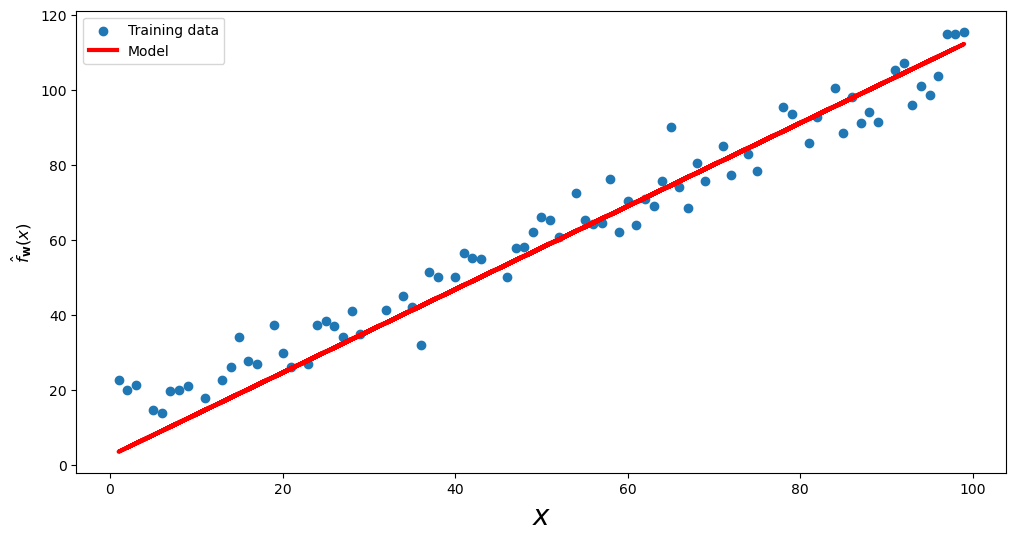

In [9]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=12)
plt.legend();

**Conclusiones**

Esta actividad me permitió repasar lo que ya se ha discutido en clase a través de comentar a detalle un programa sencillo del uso de redes neuronales, en este caso, de una sola neurona. Además visité más a fondo la sintaxis y comandos de TensorFlow de Google, la cual será una estructura frecuente en este curso. El comentar cada línea también me permitió recordar las distintas funciones relevantes al manejo de datos con redes neuronales, como las distintas capas de activación o los parámetros que se usan para ajustar diversos resultados. Me motivó un poco a seguir investigando y aclarando dudas respecto al uso de códigos para estas aplicaciones.

__Referencias__

López, M. (2024, 25 abril). Librerías de Python, ¿qué son y cuáles son las mejores? Immune Technology Institute. https://immune.institute/blog/librerias-python-que-son/ 

Team, K. (s. f.). Keras documentation: Dense layer. https://keras.io/2.16/api/layers/core_layers/dense/ 

Tensorflow. (s. f.). tensorflow/tensorflow/python/keras/optimizer_v2/adam.py at master · tensorflow/tensorflow. GitHub. https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/optimizer_v2/adam.py 

Uso de Markdown para el formato de texto. (s. f.). Ayuda de Zendesk. https://support.zendesk.com/hc/es/articles/4408846544922-Uso-de-Markdown-para-el-formato-de-texto

*"Doy mi palabra de que he realizado esta actividad con integridad académica."*